Input koordinat titik segitiga (format: x,y)


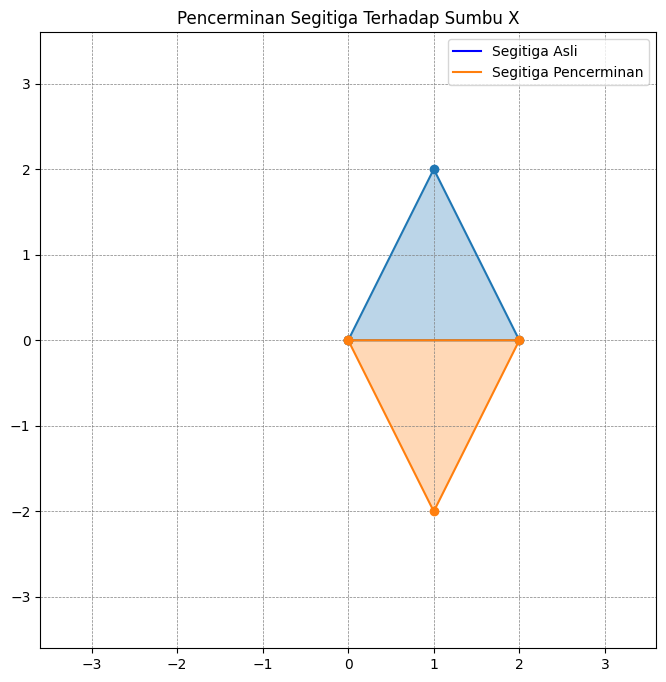

In [1]:
# Praktikum 1
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menggambar segitiga
def gambar_segitiga(titik):
    x = [titik[i][0] for i in range(len(titik))]
    y = [titik[i][1] for i in range(len(titik))]
    
    # Menutup segitiga (kembali ke titik awal)
    x.append(titik[0][0])
    y.append(titik[0][1])
    
    # Menggambar segitiga
    plt.plot(x, y, marker='o')
    plt.fill(x, y, alpha=0.3) # Mengisi segitiga dengan warna transparan

# Fungsi untuk melakukan pencerminan
def pencerminan_titik(sumbu, titik):
    if sumbu == 'x':
        # Pencerminan terhadap sumbu X
        return (titik[0], -titik[1])
    elif sumbu == 'y':
        # Pencerminan terhadap sumbu Y
        return (-titik[0], titik[1])
    elif sumbu == 'origin':
        # Pencerminan terhadap origin
        return (-titik[0], -titik[1])
    else:
        raise ValueError("Sumbu tidak valid. Pilih 'x', 'y', atau 'origin'.")

# --- Input Titik Segitiga ---
titik_segitiga = []
print("Input koordinat titik segitiga (format: x,y)")
for i in range(3):
    koordinat_input = input(f"Titik {i+1}: ")
    try:
        x, y = map(float, koordinat_input.split(','))
        titik_segitiga.append((x, y))
    except ValueError:
        print("Input tidak valid. Harap masukkan dua angka dipisahkan koma (misal: 1,2)")
        exit() # Keluar jika input salah

# Input jenis sumbu pencerminan
sumbu = input("Masukkan sumbu pencerminan ('x', 'y', atau 'origin'): ")
sumbu = sumbu.lower() # Pastikan huruf kecil untuk perbandingan

# --- Proses Pencerminan ---
titik_segitiga_pencerminan = []
try:
    for titik in titik_segitiga:
        titik_pencerminan = pencerminan_titik(sumbu, titik)
        titik_segitiga_pencerminan.append(titik_pencerminan)
except ValueError as e:
    print(f"Error: {e}")
    exit()

# --- Menggambar Segitiga Asli dan Hasil Pencerminan ---

# Membuat figure dan axes untuk plot
plt.figure(figsize=(8, 8))
plt.title(f"Pencerminan Segitiga Terhadap Sumbu {sumbu.upper()}")

# Garis bantu (grid)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Gambar segitiga asli (warna biru)
gambar_segitiga(titik_segitiga) 

# Tambahkan label untuk segitiga asli
plt.plot([], [], 'b-', label='Segitiga Asli') # Membuat entri dummy untuk legend

# Gambar segitiga setelah pencerminan (warna oranye)
gambar_segitiga(titik_segitiga_pencerminan)

# Tambahkan label untuk segitiga hasil pencerminan
plt.plot([], [], 'C1-', label=f'Segitiga Pencerminan') # C1 adalah warna default plot kedua

# Menambahkan legend dan mengatur tampilan plot
plt.legend(loc='best') # Menampilkan legend

# Mengatur batas sumbu x dan y agar terlihat seimbang
all_x = [p[0] for p in titik_segitiga + titik_segitiga_pencerminan]
all_y = [p[1] for p in titik_segitiga + titik_segitiga_pencerminan]

# Menghitung batas sumbu
x_min, x_max = min(all_x), max(all_x)
y_min, y_max = min(all_y), max(all_y)

# Menambahkan padding
padding = max(abs(x_max - x_min), abs(y_max - y_min)) * 0.15 + 1

plt.xlim(min(x_min, y_min) - padding, max(x_max, y_max) + padding)
plt.ylim(min(x_min, y_min) - padding, max(x_max, y_max) + padding)

# Mengatur aspek rasio agar sumbu x dan y memiliki skala yang sama (penting untuk geometri)
plt.gca().set_aspect('equal', adjustable='box') 

# Menampilkan plot
plt.show()

Masukkan detail untuk Persegi Panjang Asli:


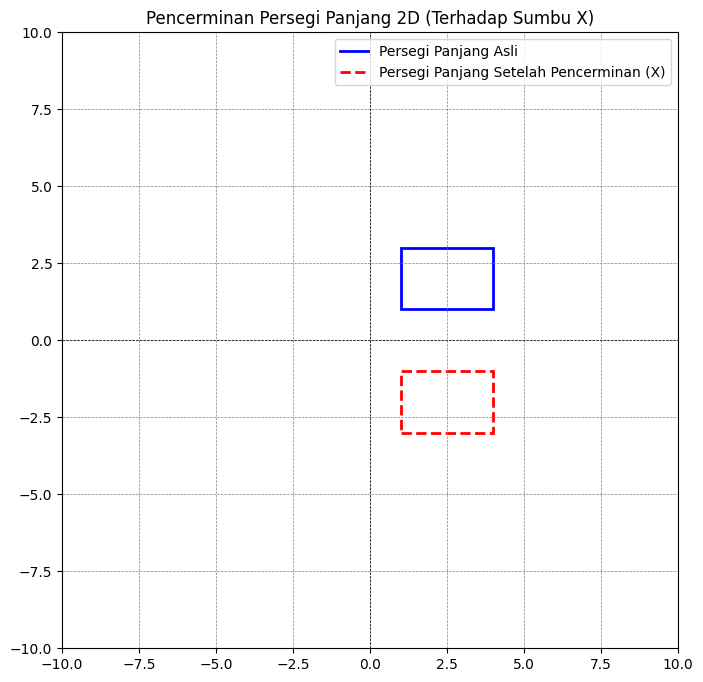

In [2]:
# Praktikum 2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Fungsi untuk menggambar persegi panjang
def gambar_persegi_panjang(ax, x, y, lebar, tinggi, label='Persegi Panjang', 
                           fill=True, edgecolor='blue', linewidth=2, linestyle='-'):
    """
    Fungsi untuk menggambar persegi panjang pada grafik ax.
    x: koordinat x sudut kiri bawah
    y: koordinat y sudut kiri bawah
    lebar: lebar persegi panjang
    tinggi: tinggi persegi panjang
    """
    # Membuat objek persegi panjang
    persegi_panjang = patches.Rectangle((x, y), lebar, tinggi, 
                                        edgecolor=edgecolor, facecolor='none', 
                                        fill=fill, linewidth=linewidth, linestyle=linestyle)
    
    # Menambahkan persegi panjang ke axes
    ax.add_patch(persegi_panjang)
    
    # Menambahkan entri dummy untuk legend
    ax.plot([], [], color=edgecolor, linestyle=linestyle, linewidth=linewidth, label=label)
    

# Fungsi untuk melakukan pencerminan persegi panjang
def pencerminan_persegi_panjang(x, y, lebar, tinggi, sumbu):
    """
    Fungsi untuk melakukan pencerminan persegi panjang terhadap sumbu
    yang ditentukan ('X', 'Y', atau 'Origin').
    """
    
    # Pencerminan terhadap sumbu X
    if sumbu == 'X':
        # Koordinat baru: x tetap, y baru = y lama - tinggi. Tinggi tetap, Lebar tetap.
        # Catatan: Pencerminan sumbu X membalik posisi y dan y+tinggi
        return x, -(y + tinggi), lebar, tinggi
    
    # Pencerminan terhadap sumbu Y
    elif sumbu == 'Y':
        # Koordinat baru: x baru = x lama - lebar. Lebar tetap, y tetap, tinggi tetap.
        # Catatan: Pencerminan sumbu Y membalik posisi x dan x+lebar
        return -(x + lebar), y, lebar, tinggi
    
    # Pencerminan terhadap origin
    elif sumbu == 'ORIGIN':
        # Menggabungkan efek pencerminan X dan Y
        return -(x + lebar), -(y + tinggi), lebar, tinggi
    
    # Input sumbu tidak valid
    return -x, -y, lebar, tinggi # Kasus default atau error, mungkin bukan yang dimaksud di kode asli

# --- Input dari pengguna ---
print("Masukkan detail untuk Persegi Panjang Asli:")
x = float(input("Masukkan koordinat X sudut kiri bawah: "))
y = float(input("Masukkan koordinat Y sudut kiri bawah: "))
lebar = float(input("Masukkan lebar persegi panjang: "))
tinggi = float(input("Masukkan tinggi persegi panjang: "))

# Input sumbu pencerminan
sumbu = input("Pilih sumbu pencerminan (X, Y, atau Origin): ").strip().upper()

# --- Membuat plot ---
fig, ax = plt.subplots(figsize=(8, 8))

# --- Menggambar persegi panjang asli ---
gambar_persegi_panjang(ax, x, y, lebar, tinggi, label='Persegi Panjang Asli', 
                       edgecolor='blue', linestyle='-')

# --- Menghitung dan Menggambar persegi panjang setelah pencerminan ---
x_baru, y_baru, lebar_baru, tinggi_baru = pencerminan_persegi_panjang(x, y, lebar, tinggi, sumbu)

gambar_persegi_panjang(ax, x_baru, y_baru, lebar_baru, tinggi_baru, 
                       label=f'Persegi Panjang Setelah Pencerminan ({sumbu})', 
                       edgecolor='red', linestyle='--')


# --- Menambahkan detail ke plot ---

# Mengatur batas sumbu X dan Y
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Mengatur aspek rasio agar skala sumbu X dan Y sama (penting untuk geometri)
ax.set_aspect('equal', adjustable='box')

# Menambahkan garis bantu sumbu X dan Y yang lebih jelas
ax.axhline(0, color='black', linewidth=0.5, ls='--') # Sumbu X
ax.axvline(0, color='black', linewidth=0.5, ls='--') # Sumbu Y

# Menambahkan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Menampilkan legend
plt.legend(loc='best')

# Menambahkan judul plot
plt.title(f'Pencerminan Persegi Panjang 2D (Terhadap Sumbu {sumbu})')

# Menampilkan plot
plt.show()


Masukkan detail untuk Lingkaran Asli:


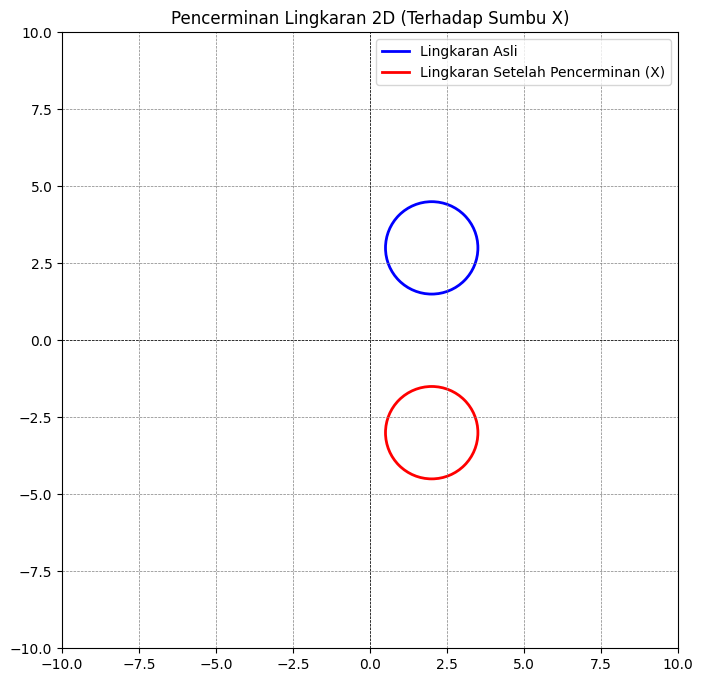

In [3]:
# Praktikum 3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Fungsi untuk menggambar lingkaran
def gambar_lingkaran(ax, x, y, radius, label='Lingkaran', fill=False, edgecolor='blue', linewidth=2):
    """
    Fungsi untuk menggambar lingkaran pada grafik ax.
    (x, y): koordinat pusat lingkaran
    radius: jari-jari lingkaran
    """
    # Membuat objek lingkaran
    lingkaran = patches.Circle((x, y), radius, 
                              fill=fill, edgecolor=edgecolor, 
                              linewidth=linewidth)
    
    # Menambahkan lingkaran ke axes
    ax.add_patch(lingkaran)
    
    # Menambahkan entri dummy untuk legend
    ax.plot([], [], color=edgecolor, linewidth=linewidth, label=label)

# Fungsi untuk mencerminkan lingkaran
def pencerminan_lingkaran(x, y, radius, sumbu):
    """
    Fungsi untuk melakukan pencerminan lingkaran.
    Pencerminan lingkaran hanya memengaruhi posisi pusat (x, y); jari-jari (radius) tetap.
    """
    
    # Pencerminan terhadap sumbu X
    if sumbu == 'X':
        # x tetap, y menjadi -y
        return x, -y, radius
    
    # Pencerminan terhadap sumbu Y
    elif sumbu == 'Y':
        # x menjadi -x, y tetap
        return -x, y, radius
    
    # Pencerminan terhadap Origin
    elif sumbu == 'ORIGIN':
        # x menjadi -x, y menjadi -y
        return -x, -y, radius
    
    # Sumbu tidak valid
    else:
        raise ValueError("Sumbu tidak valid. Pilih 'X', 'Y', atau 'Origin'.")

# --- Input dari pengguna ---
try:
    print("Masukkan detail untuk Lingkaran Asli:")
    x = float(input("Masukkan koordinat X pusat lingkaran: "))
    y = float(input("Masukkan koordinat Y pusat lingkaran: "))
    radius = float(input("Masukkan radius lingkaran: "))
    
    sumbu = input("Pilih sumbu pencerminan (X, Y, atau Origin): ").strip().upper()
    
    if radius <= 0:
        raise ValueError("Radius harus lebih besar dari 0.")
        
except ValueError as e:
    print(f"Input tidak valid: {e}")
    exit()

# --- Membuat plot (Figure dan Axes) ---
fig, ax = plt.subplots(figsize=(8, 8))

# --- Menggambar lingkaran asli (warna biru) ---
gambar_lingkaran(ax, x, y, radius, label='Lingkaran Asli', 
                 edgecolor='blue', linewidth=2)

# --- Menghitung dan Menggambar lingkaran setelah pencerminan (warna merah) ---
try:
    x_baru, y_baru, radius_baru = pencerminan_lingkaran(x, y, radius, sumbu)
    
    gambar_lingkaran(ax, x_baru, y_baru, radius_baru, 
                     label=f'Lingkaran Setelah Pencerminan ({sumbu})', 
                     edgecolor='red', linewidth=2)
    
except ValueError as e:
    print(f"Error dalam pencerminan: {e}")
    plt.close(fig) # Tutup figure yang sudah dibuat
    exit()


# --- Menambahkan detail ke plot ---

# Mengatur batas sumbu X dan Y (sesuai gambar: -10 hingga 10)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Mengatur aspek rasio agar skala sumbu X dan Y sama (penting untuk geometri)
ax.set_aspect('equal', adjustable='box')

# Menambahkan garis bantu sumbu X dan Y
ax.axhline(0, color='black', linewidth=0.5, ls='--') # Sumbu X
ax.axvline(0, color='black', linewidth=0.5, ls='--') # Sumbu Y

# Menambahkan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Menampilkan legend
plt.legend(loc='best')

# Menambahkan judul plot
plt.title(f"Pencerminan Lingkaran 2D (Terhadap Sumbu {sumbu})")

# Menampilkan plot
plt.show()

# 3. Amati hasilnya.